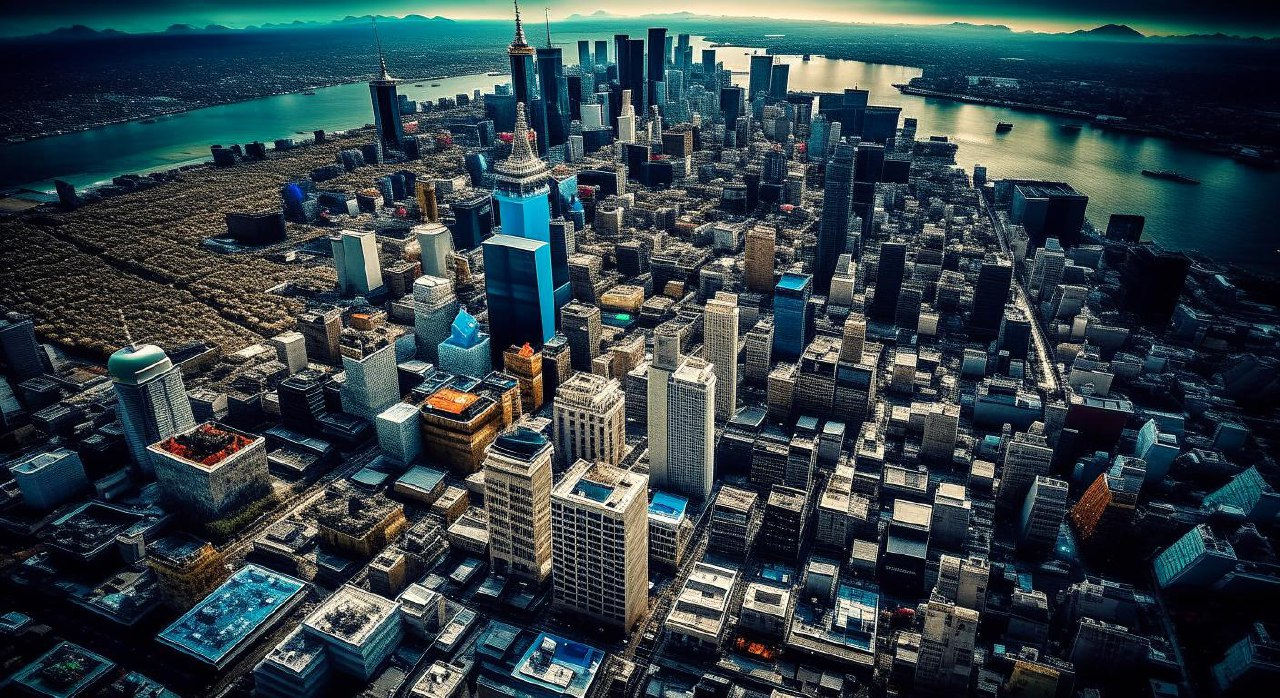

In [26]:
# Импортируем все нужные библиотеки
import pandas as pd
import numpy as np
import os
import threading
from tqdm import tqdm
import pandas as pd
import gdown
import openai
import time
import json

Скачиваем рейтинги с сайта fortune 500  (https://fortune.com/ranking/)

ps. (просто скопировал их мышкой в excel файлы)

In [27]:
gdown.download('https://drive.google.com/uc?id=1mKBwlwo1HVAIFljJ7FyncyqOo2d9DMsW', output='fortune1000_2023.xlsx', quiet=True)
gdown.download('https://drive.google.com/uc?id=1vPP8sHjxHipW5Cc6B6rhXmzIyJfGVIxM', output='fortune1000_2000.xlsx', quiet=True)

'fortune1000_2000.xlsx'

In [28]:
df_2000 = pd.read_excel('fortune1000_2000.xlsx')
df = pd.read_excel('fortune1000_2023.xlsx')
df_2000 = df_2000.rename(columns = {'NAME' : '2000', 'RANK' : 'Rank'})
df = df.rename(columns = {'NAME' : '2023', 'RANK' : 'Rank_2023'})
df = df[['Rank_2023','2023']]
df['2000'] = df_2000['2000']
df.head()

,Rank_2023,2023,2000
0,1,Walmart,"Wal-Mart Stores, Inc."
1,2,Amazon,General Motors Corporation
2,3,Exxon Mobil,Exxon Mobil Corporation
3,4,Apple,Ford Motor Company
4,5,UnitedHealth Group,General Electric Company


Итак, мы скачали два рейтинга Fortune global 1000.


---


Теперь нам нужно привести все названия компаний к одному времени (ведь некоторые компании в 2000 году назывались по-другому.)

Для этого
*   Для каждой компании из рейтинга 2023 года найдем список ее предыдущих названий
*   При сравнении рейтингов будем сравнивать эти найденные названия с названиями компаний рейтинга 2000 года.





Как мы видим, простое попарное сравнение дает нам всего 33 одинаковых названия компаний в двух рейтингах, но этого мало.
Подключим Chat-GPT для решения этой проблемы

Ниже приведем код для запуска chat GPT (будьте осторожны, если у вас нет платной подписки, то чат джпт будет работать около 5 дней, так как есть ограничение на 200 запросов в сутки, а здесь их 1000 стоит)

In [22]:
#загрузим токен для доступа к chatGPT
with open('.env', "r") as file:
    api = file.readline().strip()
    api = api.split('TOKEN=')[1]

In [18]:
def chat_generation(companies):
  content = "Forget what you did before. Here is a company name from fortune global 1000. Write to this company a list of it`s previous names as public companies and a name of the company in the 2003 or 2002. If there is no previous names write the name the company had in 2003. If company had an extended name from fortune 1000 write extenden name of the company. Do it in a manner of json, output should be good for api.  The name of the company is - : "
  companies = ' '.join(companies)
  content += companies
  completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": content}] )
  return completion.choices[0].message.content


# Пример работы ChanGPT:
n = chat_generation(['Dow'])
json.loads(n)

In [67]:
%time

from openai.error import RateLimitError, ServiceUnavailableError, APIConnectionError
l = []
k = []
i = 0

for company in tqdm(fd):
    i += 1
    if  True:
        try:
            generated = chat_generation([company])
            print(company, ' ', generated)
        except ServiceUnavailableError:
            print(f'ServiceUnavailableError, wait for 900 sec. current company - {i}/1000')
            time.sleep(900)
            try:
                generated = chat_generation([company])
            except:
                print('Trial did not succeed')
                break
        except RateLimitError:
            print(f'rate limit_err, wait for 900 sec. current company - {i}/1000')
            time.sleep(900)
            try:
                generated = chat_generation([company])
            except:
                print('Trial did not succeed')
                break
        except APIConnectionError:
            print(f'APIConnectionError, wait for 900 sec. current company - {i}/1000')
            time.sleep(900)
            try:
                generated = chat_generation([company])
            except:
                print('Trial did not succeed')
                break
            
        l.append(generated)
        time.sleep(60)
    if i % 100 == 0 and (i not in [100, 200, 300, 400, 500, 600, 700]):
        time.sleep(300)



CPU times: total: 0 ns
Wall time: 0 ns



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

News Corp.   {
  "companyName": "News Corp",
  "previousNames": [
    {
      "year": "2003",
      "name": "News Corp"
    }
  ]
}



 20%|████████████████▊                                                                   | 1/5 [01:02<04:10, 62.54s/it]

ODP   {
  "companyName": "ODP",
  "previousNames": [
    "Office Depot, Inc.",
    "The Office Club, Inc."
  ],
  "name2002": "Office Depot, Inc."
}



 40%|█████████████████████████████████▌                                                  | 2/5 [02:05<03:08, 62.74s/it]

Zions Bancorp.   {
  "companyName": "Zions Bancorp",
  "previousNames": [
    "Zions First National Bank",
    "Zions Bancorporation"
  ],
  "name2003": "Zions Bancorp"
}



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [03:11<02:08, 64.21s/it]

Western Alliance Bancorp.   {
  "companyName": "Western Alliance Bancorp",
  "previousNames": {
    "2002": "Western Alliance Bancorporation",
    "2003": "Western Alliance Bancorporation",
    "2004": "Western Alliance Bank",
    "2005": "Western Alliance Bank Corp",
    "2006": "Western Alliance Bancorporation",
    "2007": "Western Alliance Bancorp",
    "2008": "Western Alliance Bancorp",
    "2009": "Western Alliance Bancorporation",
    "2010": "Western Alliance Bancorp",
    "2011": "Western Alliance Bancorp",
    "2012": "Western Alliance Bancorporation",
    "2013": "Western Alliance Bancorp",
    "2014": "Western Alliance Bancorporation",
    "2015": "Western Alliance Bancorp",
    "2016": "Western Alliance Bancorp",
    "2017": "Western Alliance Bancorporation",
    "2018": "Western Alliance Bancorp",
    "2019": "Western Alliance Bancorporation"
  }
}



 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [04:27<01:09, 69.02s/it]

Agilon health   {
   "companyName": "Agilon health",
   "previousNames": {
      "2003": "Agilon health"
   }
}


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:30<00:00, 66.15s/it]


In [ ]:
len(l)

In [ ]:
file_path = "chat_gpt_helper.txt"

with open(file_path, "w") as file:
    file.write(json.dumps(l))

print("Merged dictionary saved to", file_path)

Итак, мы загрузили историю названий каждой из компаний в файл, который сможем дальше использовать.
Теперь осталось привести файл в удобочитаемый вид, и можно будет проводить анализ

# из каждого запроса в чат дж п т возмем все имена
def get_values(dicti):
    list_names = []
    for key, item in dicti.items():
        if type(item) == str:
            list_names.append(item)
        elif type(item) == list:
            for i in item:
                if type(i) == dict:
                    for fg_key, gf_item in i.items():
                        if fg_key !='year':
                            assert type(fg_key) == str, print(fg_key)
                            list_names.append(gf_item)
                else:
                    assert type(i) == str, print(i)
                    list_names.append(i)
    return list_names

In [ ]:
# загрузим обратно список ответов ChatGPT
with open('chat_gpt_helper.txt', "r") as file:
    b = json.load(file)

# создадим словарь, где каждому названию компании будет соответствовать список ее предыдущих имен из chatGPT
tl = []
for iterr, i in enumerate(b):
    values = get_values(i)
    for j in i.items():
        name = j[1]
        if name in ['News Corp', 'Zions Bancorp', 'Western Alliance Bancorp']:
            name +='.'
        break
    try:
        assert type(values[0]) != list, print(values)
        tl.append({name :values})
    except:
        print(name, values)
        print(i)

# Сохраним файл
with open('ready.txt', "w") as file:
    file.write(json.dumps(tl))


Все, файл с историей имен готов, можно приступать к анализу